In [1]:
# Step 1: Load and preprocess the data

import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file containing the simulated login timestamps
df = pd.read_json("logins.json")

# Convert the login_time column to datetime format
df['login_time'] = pd.to_datetime(df['login_time'])

# Set the login_time as the DataFrame index
df.set_index('login_time', inplace=True)

In [2]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
# Step 2: Aggregate Login Counts by 15-Minute Intervals

# Resample the data in 15-minute intervals and count the number of logins per interval
login_counts = df.resample('15min').size()

# Convert the Series to a DataFrame for easier handling (optional)
login_counts = login_counts.to_frame(name="login_count")

In [11]:
print(login_counts)

                     login_count
login_time                      
1970-01-01 20:00:00            2
1970-01-01 20:15:00            6
1970-01-01 20:30:00            9
1970-01-01 20:45:00            7
1970-01-01 21:00:00            1
...                          ...
1970-04-13 17:45:00            5
1970-04-13 18:00:00            5
1970-04-13 18:15:00            2
1970-04-13 18:30:00            7
1970-04-13 18:45:00            6

[9788 rows x 1 columns]


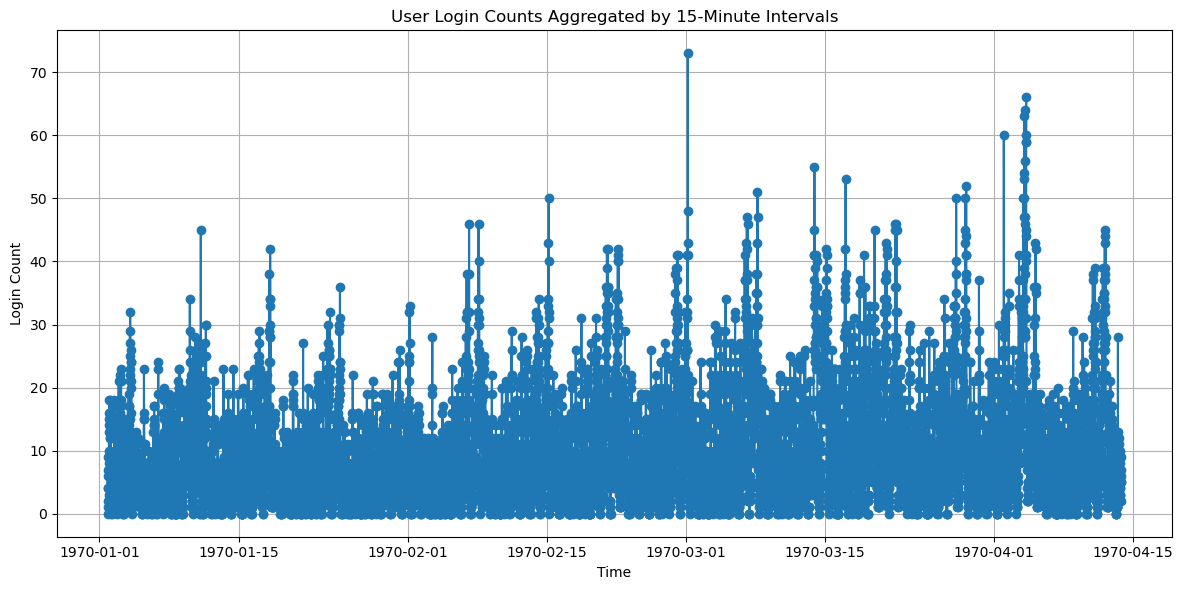

In [13]:
# Step 3: Visualize the Aggregated Time Series

plt.figure(figsize=(12, 6))
plt.plot(login_counts.index, login_counts['login_count'], marker='o', linestyle='-')
plt.title("User Login Counts Aggregated by 15-Minute Intervals")
plt.xlabel("Time")
plt.ylabel("Login Count")
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary of Findings

### Regular Daily Patterns
The time series exhibits a clear cyclical pattern, with peaks typically occurring at consistent times of day and troughs during off-peak hours. This indicates a strong daily cycle in user login behavior.

### Stable Range with Occasional Spikes
Most 15-minute intervals fall in a moderate range (roughly 0–40 logins), but sporadic spikes exceed 60–70 logins. These spikes may represent short-term surges in user activity (e.g., special events or promotions).

### No Major Gaps
The data appears continuous from early January through mid-April 1970 without large missing periods, suggesting a relatively complete record of logins in this simulated dataset.

### Potential Data Quality Considerations
All timestamps appear to be from 1970, which may indicate placeholder or simulated dates rather than real-world logs. If this is intentional (e.g., a synthetic dataset), it’s fine; otherwise, we need to check for correct date handling.

Overall, the 15-minute aggregation highlights a pronounced daily rhythm with occasional bursts of higher demand. If this were a real-world scenario, you’d investigate the causes of the spikes and confirm whether the 1970 timestamps are accurate or a placeholder.